
===== Load and Explore the Iris Dataset =====
Feature Matrix Shape: (150, 2), Target Vector Shape: (150,)

===== KNN Prediction with n_neighbors=15 =====
New Data Points Shape: (3, 2)
Data Point 1: [5.1 3.5] => Predicted Class: 0
Data Point 2: [4.7 3.2] => Predicted Class: 0
Data Point 3: [6. 3.] => Predicted Class: 1

===== Train-Test Split and KNN Accuracy =====
Test Set Accuracy (n_neighbors=6): 0.8444

===== Analyze Accuracy for Varying Number of Neighbors =====


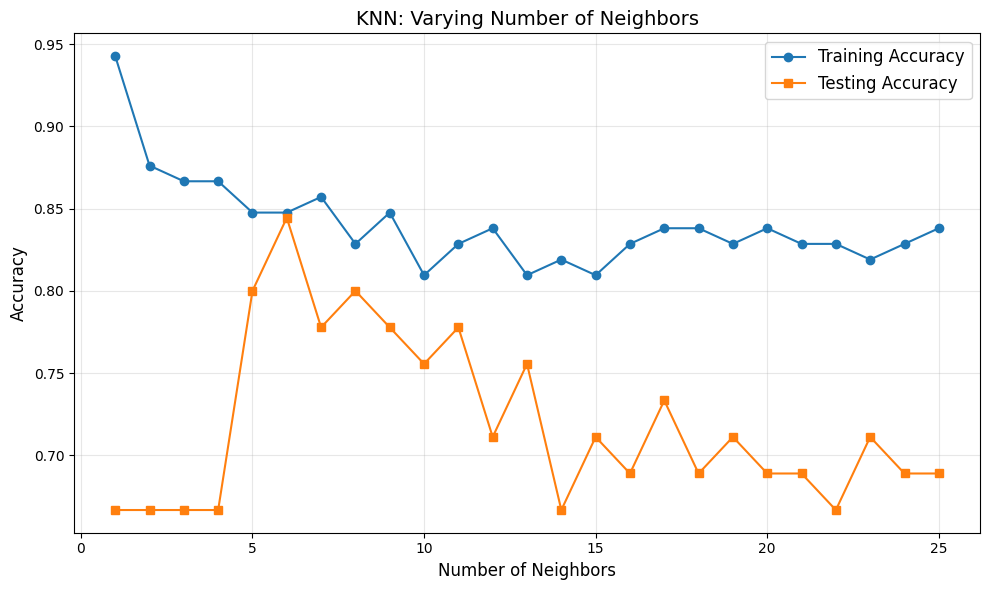


===== KNN with Confusion Matrix and Classification Report =====
Confusion Matrix:
[[20  0  0]
 [ 0 16  4]
 [ 1  6 13]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.73      0.80      0.76        20
           2       0.76      0.65      0.70        20

    accuracy                           0.82        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.81      0.82      0.81        60


===== Logistic Regression and ROC Curve =====


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


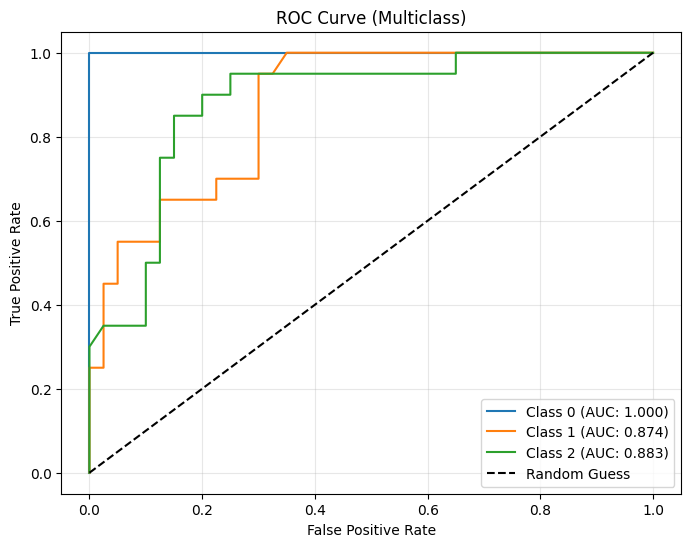

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# ======================== Load and Explore the Iris Dataset ========================
print("\n===== Load and Explore the Iris Dataset =====")
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use the first two features for simplicity
y = iris.target

print(f"Feature Matrix Shape: {X.shape}, Target Vector Shape: {y.shape}")

# ======================== KNN Prediction with n_neighbors=15 ========================
print("\n===== KNN Prediction with n_neighbors=15 =====")
# Initialize and fit KNN with n_neighbors=15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

# Create new data points to predict
X_new = np.array([
    [5.1, 3.5],
    [4.7, 3.2],
    [6.0, 3.0]
])
print(f"New Data Points Shape: {X_new.shape}")

# Make predictions on the new data points
predictions = knn.predict(X_new)
for i, pred in enumerate(predictions):
    print(f"Data Point {i + 1}: {X_new[i]} => Predicted Class: {pred}")

# ======================== Train-Test Split and Accuracy ========================
print("\n===== Train-Test Split and KNN Accuracy =====")
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train and evaluate a new KNN classifier with n_neighbors=6
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print(f"Test Set Accuracy (n_neighbors=6): {accuracy:.4f}")

# ======================== Analyze Accuracy for Varying Neighbors ========================
print("\n===== Analyze Accuracy for Varying Number of Neighbors =====")
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

# Plot training and testing accuracies
plt.figure(figsize=(10, 6))
plt.plot(neighbors, list(train_accuracies.values()), label="Training Accuracy", marker='o')
plt.plot(neighbors, list(test_accuracies.values()), label="Testing Accuracy", marker='s')
plt.title("KNN: Varying Number of Neighbors", fontsize=14)
plt.xlabel("Number of Neighbors", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# ======================== KNN with Confusion Matrix and Classification Report ========================
print("\n===== KNN with Confusion Matrix and Classification Report =====")
knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ======================== Logistic Regression and ROC Curve ========================
print("\n===== Logistic Regression and ROC Curve =====")

# Modularized ROC plotting with AUC Score
def plot_multiclass_roc(y_true, y_proba, n_classes):
    y_true_binarized = label_binarize(y_true, classes=range(n_classes)) # Binarize for multiclass ROC
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_binarized[:, i], y_proba[:, i])
        auc_score = roc_auc_score(y_true_binarized[:, i], y_proba[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC: {auc_score:.3f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Multiclass)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg.fit(X_train, y_train)
plot_multiclass_roc(y_test, logreg.predict_proba(X_test), n_classes=len(np.unique(y)))


===== Dataset Information =====
Feature Matrix Type: <class 'numpy.ndarray'>, Target Vector Type: <class 'numpy.ndarray'>

===== Single Feature Regression: BMI vs Disease Progression =====
Target Shape: (442,), BMI Feature Shape: (442,)
Reshaped BMI Feature Shape: (442, 1)


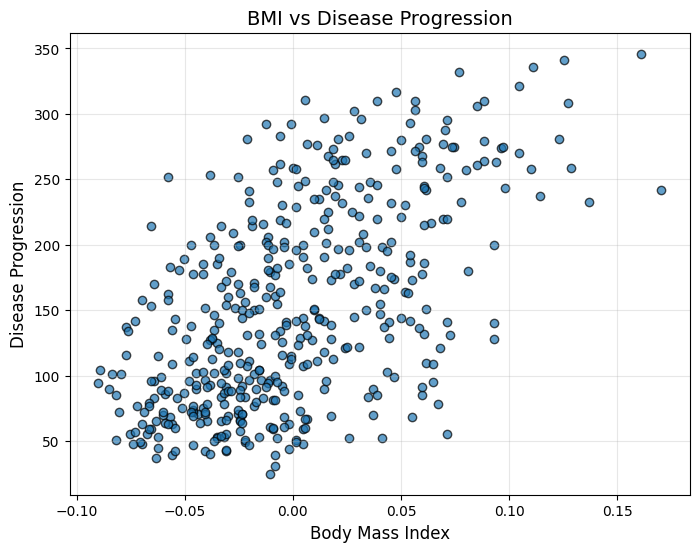

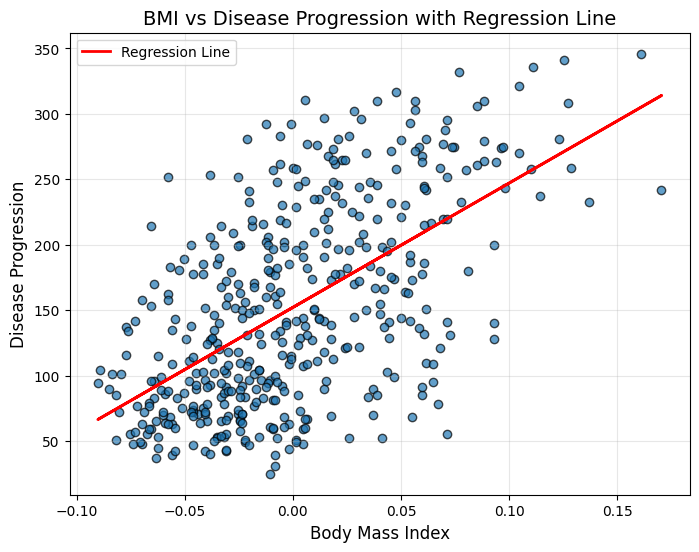


===== Full Feature Regression: All Features =====
R^2 Score: 0.4773
Root Mean Squared Error (RMSE): 53.1202

===== Cross-Validation Performance =====
Cross-validation results: [0.41517276 0.62006872 0.38784712 0.46507413 0.62970553 0.21968445]
Mean: 0.4563, Std Dev: 0.1410
95% Confidence Interval: [0.24070478 0.62850092]

===== Ridge Regression Performance =====
Alpha: 0.1    | R^2 Score: 0.4803
Alpha: 1.0    | R^2 Score: 0.4233
Alpha: 10.0   | R^2 Score: 0.1516
Alpha: 100.0  | R^2 Score: 0.0148
Alpha: 1000.0 | R^2 Score: -0.0042
Best Parameters (GridSearchCV): {'alpha': 0.0001, 'solver': 'sag'}
Best Cross-Validated Score (GridSearchCV): 0.4585943901003469
Best Parameters (RandomizedSearchCV): {'solver': 'sag', 'alpha': 0.0001}
Best Cross-Validated Score (RandomizedSearchCV): 0.4585935433914819
Test Set Score (RandomizedSearchCV): 0.47732103983626994

===== Lasso Regression Performance =====
Alpha: 0.01   | R^2 Score: 0.4787
Alpha: 1.0    | R^2 Score: 0.3619
Alpha: 10.0   | R^2 Score:

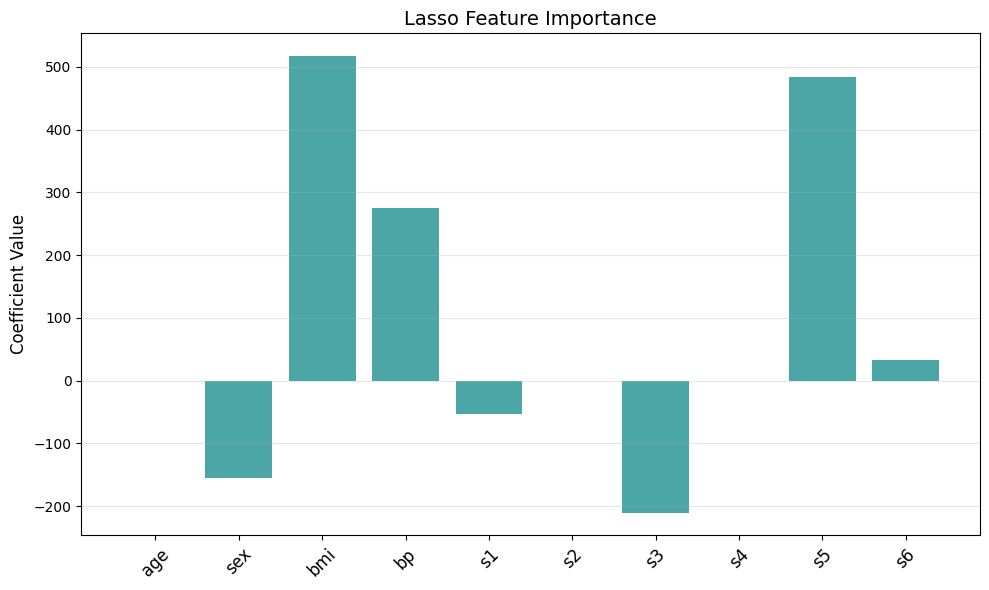

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import root_mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Load the Diabetes dataset from sklearn
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

print("\n===== Dataset Information =====")
print(f"Feature Matrix Type: {type(X)}, Target Vector Type: {type(y)}")

# ======================== Single Feature Regression: BMI vs Disease Progression ========================
print("\n===== Single Feature Regression: BMI vs Disease Progression =====")
# Use the BMI feature (3rd column in the dataset)
X_bmi = X[:, 2]
print(f"Target Shape: {y.shape}, BMI Feature Shape: {X_bmi.shape}")

# Reshape X_bmi for linear regression
X_bmi = X_bmi.reshape(-1, 1)
print(f"Reshaped BMI Feature Shape: {X_bmi.shape}")

# Scatter plot of BMI vs. Disease Progression
plt.figure(figsize=(8, 6))
plt.scatter(X_bmi, y, alpha=0.7, edgecolors='k')
plt.title("BMI vs Disease Progression", fontsize=14)
plt.ylabel("Disease Progression", fontsize=12)
plt.xlabel("Body Mass Index", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Fit a linear regression model using BMI feature
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)

# Plot regression line on top of scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_bmi, y, alpha=0.7, edgecolors='k')
plt.plot(X_bmi, predictions, color='red', linewidth=2, label="Regression Line")
plt.title("BMI vs Disease Progression with Regression Line", fontsize=14)
plt.ylabel("Disease Progression", fontsize=12)
plt.xlabel("Body Mass Index", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ======================== Full Feature Regression: All Features ========================
print("\n===== Full Feature Regression: All Features =====")
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a linear regression model using all features
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

# Evaluate model performance
r2_score = reg_all.score(X_test, y_test)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"R^2 Score: {r2_score:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# ======================== Cross-Validation Performance ========================
print("\n===== Cross-Validation Performance =====")
# Perform cross-validation
kf = KFold(n_splits=6, shuffle=True, random_state=42)
cv_results = cross_val_score(reg_all, X, y, cv=kf)
mean_cv = np.mean(cv_results)
std_cv = np.std(cv_results)
conf_interval = np.quantile(cv_results, [0.025, 0.975])
print(f"Cross-validation results: {cv_results}")
print(f"Mean: {mean_cv:.4f}, Std Dev: {std_cv:.4f}")
print(f"95% Confidence Interval: {conf_interval}")

# ======================== Ridge Regression Performance ========================
print("\n===== Ridge Regression Performance =====")
ridge_scores = []
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_scores.append(ridge.score(X_test, y_test))

for alpha, score in zip(alphas, ridge_scores):
    print(f"Alpha: {alpha:<6} | R^2 Score: {score:.4f}")

# GridSearchCV for Ridge Regression
param_grid = {"alpha": np.arange(0.0001, 1, 10),
              "solver": ["sag", "lsqr"]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid=param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print("Best Parameters (GridSearchCV):", ridge_cv.best_params_)
print("Best Cross-Validated Score (GridSearchCV):", ridge_cv.best_score_)

# RandomizedSearchCV for Ridge Regression
param_grid = {'alpha': np.arange(0.0001, 1, 10),
              "solver": ['sag', 'lsqr']}
ridge_cv = RandomizedSearchCV(ridge, param_distributions=param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print("Best Parameters (RandomizedSearchCV):", ridge_cv.best_params_)
print("Best Cross-Validated Score (RandomizedSearchCV):", ridge_cv.best_score_)

# Test Set Score
test_score = ridge_cv.score(X_test, y_test)
print("Test Set Score (RandomizedSearchCV):", test_score)

# ======================== Lasso Regression Performance ========================
print("\n===== Lasso Regression Performance =====")
lasso_scores = []
alphas = [0.01, 1.0, 10.0, 20.0, 50.0]
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_scores.append(lasso.score(X_test, y_test))

for alpha, score in zip(alphas, lasso_scores):
    print(f"Alpha: {alpha:<6} | R^2 Score: {score:.4f}")

# ======================== Lasso Regression: Feature Importance ========================
print("\n===== Lasso Regression: Feature Importance =====")
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.figure(figsize=(10, 6))
plt.bar(feature_names, lasso_coef, color='teal', alpha=0.7)
plt.xticks(rotation=45, fontsize=12)
plt.title("Lasso Feature Importance", fontsize=14)
plt.ylabel("Coefficient Value", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Load the California Housing dataset
data = fetch_california_housing(as_frame=True)
housing_df = data.frame

# Add a categorical feature by binning 'HouseAge' into age groups
housing_df['HouseAgeGroup'] = pd.cut(housing_df['HouseAge'], bins=[0, 10, 20, 30, 50], labels=['0-10', '11-20', '21-30', '31+'])

# Define preprocessing for numerical and categorical features
num_features = data.feature_names
cat_features = ['HouseAgeGroup']

# Pipeline for numerical features
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline for categorical features
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# Define multiple models for comparison
models = {
    'KNeighborsRegressor': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', KNeighborsRegressor())
    ]),
    'RandomForestRegressor': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    'SVR': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', SVR())
    ])
}

# Prepare the features (X) and target (y)
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate models using cross-validation
print("Evaluating models using cross-validation...\n")
model_scores = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model_pipeline in models.items():
    # Calculate cross-validation scores
    cv_scores = -1 * cross_val_score(model_pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)
    model_scores[model_name] = np.mean(cv_scores)
    print(f"{model_name}: Average RMSE = {np.sqrt(np.mean(cv_scores)):.4f}")

# Select the best model based on CV scores
best_model_name = min(model_scores, key=model_scores.get)
print("\n" + "="*150)
print(f"Best model based on cross-validation scores: {best_model_name}")
print("="*150)

# Define hyperparameter grid for the selected model
if best_model_name == 'KNeighborsRegressor':
    param_grid = {
        'model__n_neighbors': [3, 5, 7, 10],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    }
elif best_model_name == 'RandomForestRegressor':
    param_grid = {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    }
elif best_model_name == 'SVR':
    param_grid = {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf', 'poly'],
        'model__gamma': ['scale', 'auto']
    }

# Perform grid search on the best model
print(f"\nPerforming grid search for {best_model_name}...")
best_pipeline = models[best_model_name]
grid_search = GridSearchCV(best_pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best hyperparameters and CV score
print("\n" + "="*50)
print(f"Best parameters for {best_model_name}: {grid_search.best_params_}")
print(f"Best cross-validated RMSE: {np.sqrt(-grid_search.best_score_):.4f}")
print("="*50)

# Evaluate the best model on the test set
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\n" + "="*150)
print(f"Test RMSE for the best model ({best_model_name}): {test_rmse:.4f}")
print("="*150)

# Completion message
print("\nPipeline training, hyperparameter tuning, and testing completed successfully!")

Evaluating models using cross-validation...

KNeighborsRegressor: Average RMSE = 0.6604
RandomForestRegressor: Average RMSE = 0.5115
SVR: Average RMSE = 0.5965

Best model based on cross-validation scores: RandomForestRegressor

Performing grid search for RandomForestRegressor...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best parameters for RandomForestRegressor: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best cross-validated RMSE: 0.5099

Test RMSE for the best model (RandomForestRegressor): 0.5041

Pipeline training, hyperparameter tuning, and testing completed successfully!
